In [11]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
# LOAD THE DATASET AND GET THE IMPORTNAT INFORMATION FROM IT

def load_and_explore_data(filepath):
    dataset = np.load(filepath)
    X, y = dataset["X"], dataset["y"]
    
    print("="*60)
    print("DATASET EXPLORATION")
    print("="*60)
    print(f"Dataset shape: X={X.shape}, y={y.shape}")
    print(f"Number of samples: {X.shape[0]}")
    print(f"Image dimensions: 20x20 pixels (400 features when flattened)")
    print(f"Pixel value range: {X.min():.0f} - {X.max():.0f}")
    print(f"\nClass distribution:")
    unique, counts = np.unique(y, return_counts=True)
    for label, count in zip(unique, counts):
        print(f"  Class {label:2d}: {count:4d} samples ({100*count/len(y):.1f}%)")
    
    return X, y

def visualize_samples(X, y, n_samples=15):
    fig, axes = plt.subplots(3, 5, figsize=(12, 8))
    axes = axes.flatten()
    
    unique_classes = np.unique(y)
    shown = {c: 0 for c in unique_classes}
    idx = 0
    
    for i in range(len(X)):
        if idx >= n_samples:
            break
        if shown[y[i]] < 2:
            axes[idx].imshow(X[i].reshape(20, 20), cmap='gray', vmin=0, vmax=255)
            axes[idx].set_title(f'Class {y[i]}')
            axes[idx].axis('off')
            shown[y[i]] += 1
            idx += 1
    
    plt.tight_layout()
    plt.show()


In [ ]:
# PREPROCESSING
def preprocess_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, scaler

In [ ]:
# MODEL 1 - RANDOM FOREST
def train_random_forest(X_train, y_train, X_val, y_val):
    print("\n" + "="*60)
    print("MODEL 1: RANDOM FOREST CLASSIFIER")
    print("="*60)
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV accuracy: {grid_search.best_score_:.4f}")
    
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred)
    print(f"Validation accuracy: {val_accuracy:.4f}")
    
    return best_rf, val_accuracy


In [ ]:
# PART 4: MODEL 2 - SUPPORT VECTOR MACHINE (SVM)
def train_svm(X_train, y_train, X_val, y_val):
    print("\n" + "="*60)
    print("MODEL 2: SUPPORT VECTOR MACHINE (SVM)")
    print("="*60)
    
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3]
    }
    
    svm = SVC(random_state=42)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV accuracy: {grid_search.best_score_:.4f}")
    
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred)
    print(f"Validation accuracy: {val_accuracy:.4f}")
    
    return best_svm, val_accuracy

In [ ]:
# MODEL EVALUATION AND SELECTION
def evaluate_model(model, X_test, y_test, model_name):
    print("\n" + "="*60)
    print(f"FINAL EVALUATION: {model_name}")
    print("="*60)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\nTest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    
    cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    
    return accuracy, y_pred

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

DATASET EXPLORATION
Dataset shape: X=(13067, 400), y=(13067,)
Number of samples: 13067
Image dimensions: 20x20 pixels (400 features when flattened)
Pixel value range: 0 - 255

Class distribution:
  Class  0:  546 samples (4.2%)
  Class  1:  900 samples (6.9%)
  Class  2:  804 samples (6.2%)
  Class  3:  454 samples (3.5%)
  Class  4: 1022 samples (7.8%)
  Class  5: 1362 samples (10.4%)
  Class  6:  858 samples (6.6%)
  Class  7:  557 samples (4.3%)
  Class  8:  888 samples (6.8%)
  Class  9:  834 samples (6.4%)
  Class 10:  782 samples (6.0%)
  Class 11: 1601 samples (12.3%)
  Class 12:  702 samples (5.4%)
  Class 13:  884 samples (6.8%)
  Class 14:  873 samples (6.7%)


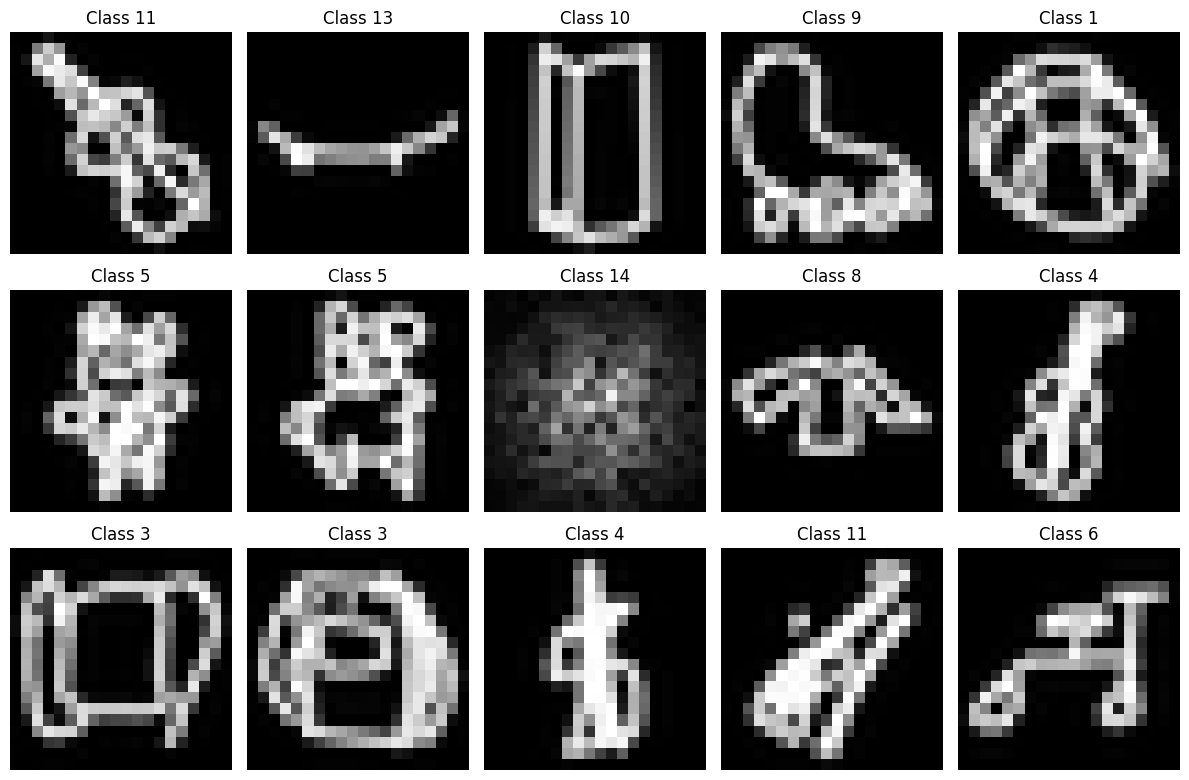


MODEL 1: RANDOM FOREST CLASSIFIER
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.7388
Validation accuracy: 0.7218

MODEL 2: SUPPORT VECTOR MACHINE (SVM)
Best parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best CV accuracy: 0.7793
Validation accuracy: 0.7773

MODEL COMPARISON
Random Forest validation accuracy: 0.7218
SVM validation accuracy: 0.7773

Selected model: SVM

FINAL EVALUATION: SVM

Test Accuracy: 0.7884

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       109
           1       0.60      0.77      0.67       180
           2       0.90      0.83      0.86       161
           3       0.73      0.48      0.58        90
           4       0.64      0.59      0.61       205
           5       0.80      0.90      0.85       273
           6       0.84      0.87      0.85       172
           7       0.54  

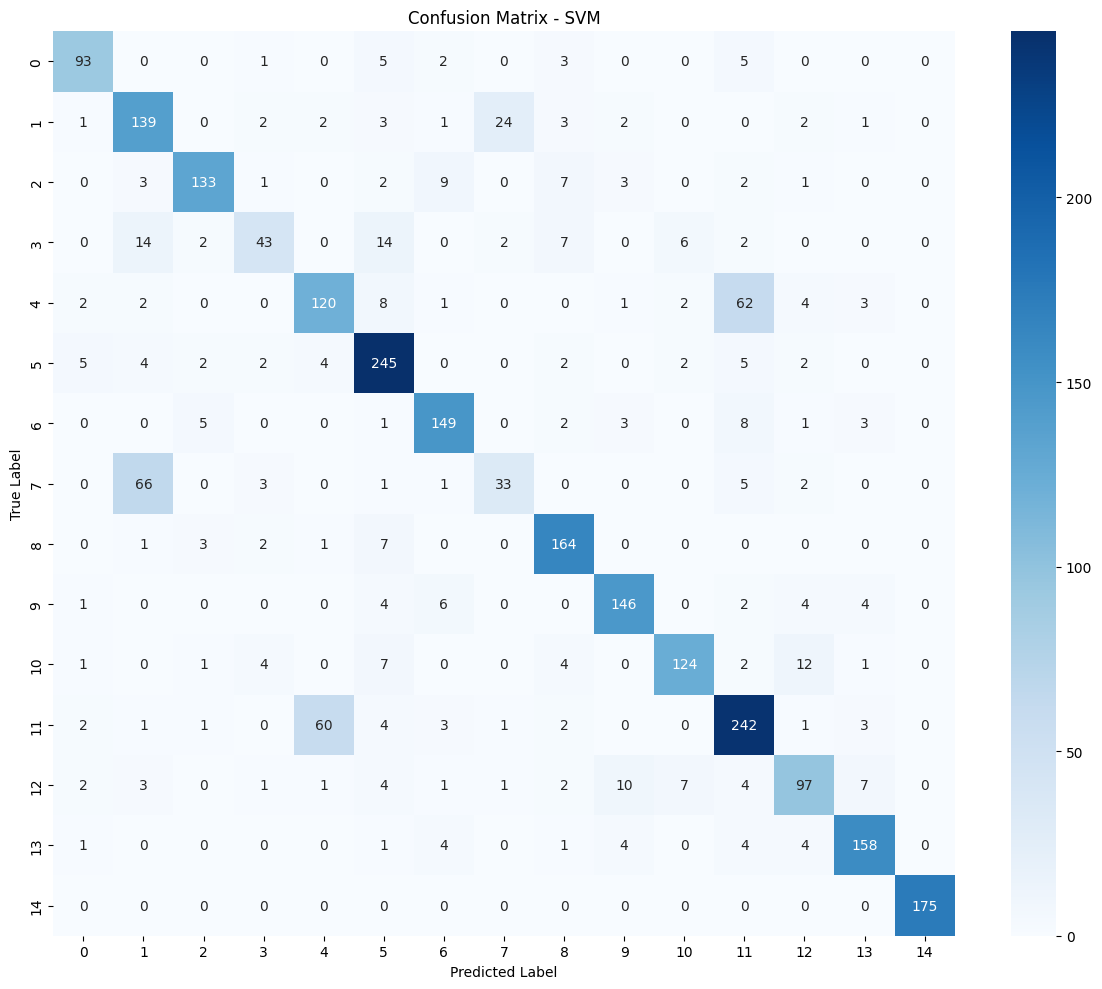


PERFORMANCE ESTIMATE FOR NEW DATA
Expected accuracy on new data: 0.7884
This estimate is based on held-out test set evaluation


In [ ]:
# MAIN
if __name__ == "__main__":
    # we load and explore data
    X, y = load_and_explore_data("dataset.npz")
    visualize_samples(X, y)
    
    # we spli tthe data in the following way : 60% train, 20% validation, 20% test
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # preprocess
    X_train_scaled, X_val_scaled, scaler = preprocess_data(X_train, X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # train models
    rf_model, rf_val_acc = train_random_forest(X_train_scaled, y_train, X_val_scaled, y_val)
    svm_model, svm_val_acc = train_svm(X_train_scaled, y_train, X_val_scaled, y_val)
    
    # model selection
    print("\n" + "="*60)
    print("MODEL COMPARISON")
    print("="*60)
    print(f"Random Forest validation accuracy: {rf_val_acc:.4f}")
    print(f"SVM validation accuracy: {svm_val_acc:.4f}")
    
    best_model = rf_model if rf_val_acc >= svm_val_acc else svm_model
    best_model_name = "Random Forest" if rf_val_acc >= svm_val_acc else "SVM"
    
    print(f"\nSelected model: {best_model_name}")
    
    # evaluate on test set
    test_acc, y_pred_test = evaluate_model(best_model, X_test_scaled, y_test, best_model_name)
    plot_confusion_matrix(y_test, y_pred_test, best_model_name)
    
    print("\n" + "="*60)
    print("PERFORMANCE ESTIMATE FOR NEW DATA")
    print("="*60)
    print(f"Expected accuracy on new data: {test_acc:.4f}")
    print(f"This estimate is based on held-out test set evaluation")
    print("="*60)